# Cat 2

In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math

In [21]:
from astropy.table import Table
t = Table.read('Data/TGAS_d125_Wright03_2Mass.vot', format='votable')

Source = t["Source"]
Gmag = t["__Gmag_"]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
QFlags = t["Qfl"]
DistW = t["Dist"]
s1= t["d_arcsec"]
s2 = t["angDist"]
plx = t['Plx']
Teff = t['Teff']
e_Jmag = t['e_Jmag']
e_Kmag = t['e_Kmag']
e_Hmag = t['e_Hmag']
sptype = t['SpType']
print("Finished reading Table. Read ",len(Jmag)," sources")

Finished reading Table. Read  31446  sources


In [3]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', 'angDist', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [5]:
# mask all data that does not have a Qfl value 

for i in range(0,len(QFlags)):
    if(QFlags[i][0] == ord("A")):
        Jmag.mask[i] = False
    else:
         Jmag.mask[i] = True
            
for i in range(0,len(QFlags)):
    if(QFlags[i][2] == ord("A")):
        Kmag.mask[i] = False
    else:
        Kmag.mask[i] = True  
        
for i in range(0,len(QFlags)):
    if(QFlags[i][1] == ord("A")):
        Hmag.mask[i] = False
    else:
        Hmag.mask[i] = True  

In [6]:
#remove stars from the Wright catalog with Spectral matches that were further away from the Tycho/Hipp position 
#by more than 4"

for i in range(0,len(DistW)):
    if(DistW[i] > 4.0):
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
for i in range(0,len(DistW)):
    if(DistW[i] > 4.0):
        print(i,DistW[i])
print("Finished masking rows with >4 arcsec matches in Wright et al")
test = DistW.compressed()
print("   Remaining number of sources: ",len(test))

Finished masking rows with >4 arcsec matches in Wright et al
   Remaining number of sources:  31335


In [ ]:
#Histogram of G band magnitudes
plt.hist(Gmag)
plt.xlabel('Gmag')
plt.ylabel('Number of Stars')
plt.show()

In [ ]:
#Histogram of J band magnitudes
plt.hist(Jmag)
plt.xlabel('Jmag')
plt.ylabel('Number of Stars')
plt.show()

In [ ]:
#Histogram of K band magnitudes
plt.hist(Kmag, range = [min(Kmag),max(Kmag)])
plt.xlabel('Kmag')
plt.ylabel('Number of Stars')
plt.show()

In [ ]:
#calculate distances and store them in table column
d_data = np.zeros(len(plx))
for i in range(len(d_data)):
    d_data[i] = 1/(plx[i]/1000)
d = Table.Column(data=d_data, name='d')

In [ ]:
#Calculate absolute magnitudes and store them in table column
Abs_mag_data = np.zeros(len(d))
for i in range(len(Abs_mag_data)):
    #Gmag is taken as apparent magnitude
    Abs_mag_data[i] = Gmag[i] - 5*math.log10(d[i]/10)
Abs_mag = Table.Column(data=Abs_mag_data, name='Abs_mag')

In [ ]:
#H-R diagram (with apparent magnitude)
plt.xlim(3500,9000)
plt.scatter(Teff, Gmag,c=d,s=1.0)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Teff')
plt.ylabel('Gmag')
plt.show()

In [ ]:
#H-R diagram (with absolute magnitude)
plt.xlim(3500,9000)
plt.scatter(Teff,Abs_mag,c=d,s=1.0)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Teff')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [13]:
#Calculate different Color indices
G_J = Gmag-Jmag
J_G = Jmag-Gmag
G_K = Gmag-Kmag
G_H = Gmag-Hmag
J_K = Jmag-Kmag
H_K = Hmag-Kmag

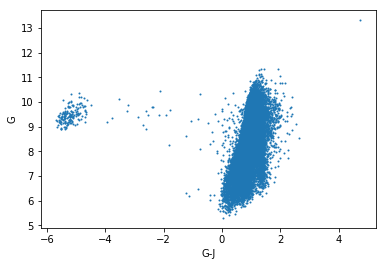

In [14]:
#Color-Color diagram with G plotted against G-J
plt.scatter(G_J,Gmag, s=1)
plt.xlabel('G-J')
plt.ylabel('G')
plt.show()


In [ ]:
#check distant matches for G-J
for i in range(len(G_J)):
    if G_J[i] < -2:
        print(t['d_arcsec'][i])

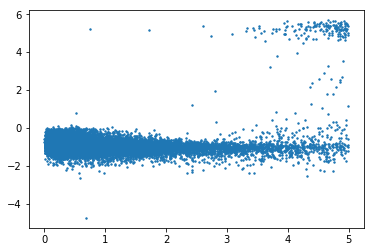

-0.884452162096
0.508069495036


In [15]:
plt.scatter(s1,J_G,s=2.0)
plt.show()
print(np.mean(J_G))
print(np.std(J_G))

 Masked  0  rows based on J-G color > 5 sigma from mean


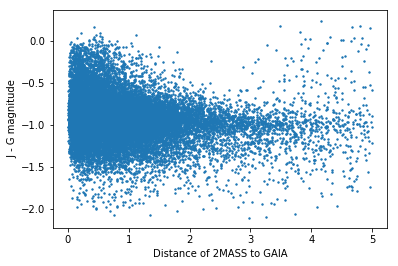

New sigma for J-G:  0.237940987214


In [18]:
#limit match radius to less than 3"
imask = 0
for i in range(0,len(J_G)):
    if(abs(J_G[i] + 0.91) > 1.20):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
print(" Masked ",imask," rows based on J-G color > 5 sigma from mean")
J_G = Jmag - Gmag
plt.xlabel("Distance of 2MASS to GAIA")
plt.ylabel(" J - G magnitude")
plt.scatter(s1,J_G,s=2.0)
plt.show()
print("New sigma for J-G: ",np.std(J_G))

In [23]:
#look at number of duplicate matches
Test = Source.compressed()
unique = set()
Gdups = set()

for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("GAIA Duplicate Source: ",Test[i])
        Gdups.add(Test[i])
    else:
        unique.add(Test[i])
        last = Test[i]
print("Finished GAIA Duplicate Check. Found: ", len(Gdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Gdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all GAIA duplicates. All sources involved")
TwoM = t["_2MASS"]
unique = set()
Tdups = set()
Test = TwoM.compressed()
for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("2MASS Duplicate Source: ",Test[i])
        Tdups.add(Test[i])
    else:
        unique.add(Test[i])
        last = Test[i]
print("Finished 2MASS Duplicate Check. Found: ", len(Tdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Tdups):
            print(Source[i],s1[i],s2[i],Gmag[i],Vmag[i]-Gmag[i],Jmag[i],Kmag[i],TwoM[i])

Finished GAIA Duplicate Check. Found:  0
Finished masking all GAIA duplicates. All sources involved
2MASS Duplicate Source:  b'07451457-0900204'
2MASS Duplicate Source:  b'03391401+6639396'
2MASS Duplicate Source:  b'11003108-4920149'
2MASS Duplicate Source:  b'06185319-3212053'
Finished 2MASS Duplicate Check. Found:  4


In [ ]:
#check distant matches for G-K
for i in range(len(G_K)):
    if G_K[i] < -2:
        print(t['d_arcsec'][i])

In [ ]:
#check distant matches for G-H
for i in range(len(G_H)):
    if G_H[i] < -2:
        print(t['d_arcsec'][i])

In [ ]:
#check distant matches for H-K
for i in range(len(H_K)):
    if G_H[i] < 0:
        print(t['d_arcsec'][i])

In [ ]:
#Color-Color diagram with G-K plotted against G-J
plt.scatter(G_J,G_K, s=1)
plt.xlabel('G-J')
plt.ylabel('G-K')
plt.show()


In [ ]:
#Color-Color diagram with J-K plotted against H-K
plt.scatter(H_K,J_K, s=1)
plt.xlabel('H-K')
plt.ylabel('J-K')
plt.show()

In [ ]:
#Plot of error in Jmag against Jmag
plt.scatter(Jmag,e_Jmag)
plt.xlabel('Jmag')
plt.ylabel('Jmag error')
plt.show()

In [ ]:
#Plot of error in Kmag against Kmag
plt.scatter(Kmag,e_Kmag)
plt.xlabel('Kmag')
plt.ylabel('Kmag error')
plt.show()

In [ ]:
#Plot of error in Hmag against Hmag
plt.scatter(Kmag,e_Kmag)
plt.xlabel('Hmag')
plt.ylabel('Hmag error')
plt.show()

In [ ]:
#Look at spectrial type
print(sptype)